# K-means clustering algorithm
This script applies the K-means algorithm to 6PCs and 18PCs. It used the Davies Bouldin (DB) Index, Silhouette score and Elbow method to determine K, the number of clusters to use.

## Load data and packages

In [50]:
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
TITLE_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=TITLE_SIZE) 

from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 
rcParams['xtick.major.pad']='8'
rcParams['ytick.major.pad']='8'

import pandas as pd 
import csv

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score, pairwise_distances
import matplotlib.cm as cm
import os


In [31]:
CLUSTERS_DIR = os.path.join('../', 'visualisation_validation', 'cluster_labels')

In [34]:
# read in principal components
PCA_components1 = pd.read_csv("principal_components.csv")

df_labels = PCA_components1.iloc[:,:2]
PCA_components1 = PCA_components1.iloc[:,2:]

## Applying K-means to 6PCs
### Silhouette score and DB index plots for range of K
Create a range of K-values and for each K calculate the inertia, silhouette score and DB Index. First plot the silhouette score and DB Index for K=2,..,10.

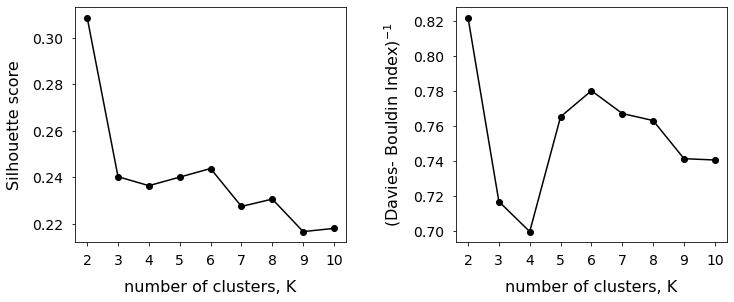

In [35]:
ks = range(2, 11) # range of K

inertias = [] # empty vector to append inertia for each K
sil = []      # empty vector to append silhouette score for each K
davies = []   # empty vector to append DB index for each K

# for loop calculates the above internal metrics for each K
for k in ks:
    # create K-means object with K clusters, random seed set at 777, applied to 6PCs
    kmeans_model = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=777).fit(PCA_components1.iloc[:,:6])
    labels = kmeans_model.labels_ # sets labels as the cluster index number to use for sil score
    
    # Append the DB Index, inertia and silhouette score to above vectors
    davies.append(davies_bouldin_score(PCA_components1.iloc[:,:6], labels))
    inertias.append(kmeans_model.inertia_)
    sil.append(silhouette_score(PCA_components1.iloc[:,:6], labels, metric='euclidean'))

# plot silhouette score (left) and DB Index (right) for each K
plt.figure(figsize=(11, 5))
plt.subplot(1,2,1)
plt.plot(ks,sil,"-o" ,color='black')
plt.ylabel('Silhouette score', fontsize=16, labelpad=10)
plt.xlabel('number of clusters, K', fontsize=16, labelpad=12)
plt.grid(False)
plt.xticks(np.arange(2, 11, step=1)) 

plt.subplot(1,2,2)
plt.plot(ks, 1/np.asarray(davies),"-o", color='black')
plt.ylabel('(Davies- Bouldin Index)$^{-1}$', fontsize=16, labelpad=10)
plt.xlabel('number of clusters, K', fontsize=16, labelpad=12)
plt.grid(False)
plt.xticks(np.arange(2, 11, step=1)) 

plt.tight_layout(pad=3.0)
# plt.savefig("sil_davies_6pc.pdf") # save the plot to pdf

### Inertia plot
Now plot the Inertia over the range of K

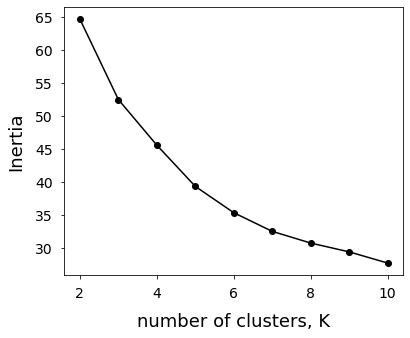

In [36]:
plt.figure(figsize=(6, 5))
y = np.array([30000,35000,40000,45000,50000,55000,60000,65000])
my_yticks = ['30', '35', '40', '45','50','55','60','65']
plt.yticks(y, my_yticks)
plt.plot(ks,inertias,"-o" ,color='black')
plt.ylabel("Inertia", fontsize=18, labelpad=10)
plt.xlabel('number of clusters, K', fontsize=18, labelpad=12)
plt.grid(False)

plt.tight_layout(pad=1.5)
# plt.savefig("inertia_6pc.pdf") # save the plot to pdf

From the above, K=2 and K=6 is chosen to compare for the remainder of the analysis.

### Visualising silhouette coefficients for K=2 and K=6

For n_clusters = 2 The average silhouette_score is : 0.3087600470216936
For n_clusters = 6 The average silhouette_score is : 0.24378966377746403


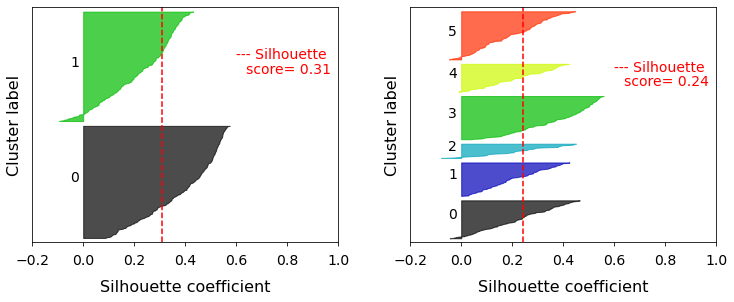

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(PCA_components1) + (2 + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 777 for reproducibility.
clusterer = KMeans(n_clusters=2,init='k-means++', n_init=10, random_state=777)
cluster_labels = clusterer.fit_predict(PCA_components1.iloc[:,:6])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
silhouette_avg = silhouette_score(PCA_components1.iloc[:,:6], cluster_labels)
print("For n_clusters =", 2,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(PCA_components1.iloc[:,:6], cluster_labels)

y_lower = 10
for i in range(2):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 2)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=14)

        # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_xlabel("Silhouette coefficient",fontsize=16, labelpad=12)
ax1.set_ylabel("Cluster label",fontsize=16, labelpad=10)

    # The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax1.text(0.6, 420, "--- Silhouette", color="red", fontsize=14)
ax1.text(0.64, 385, "score= 0.31", color="red", fontsize=14)
ax1.grid(False)
ax1.tick_params(labelsize=14)

ax2.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
ax2.set_ylim([0, len(PCA_components1) + (6 + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
clusterer = KMeans(n_clusters=6,init='k-means++', n_init=10, random_state=777)
cluster_labels = clusterer.fit_predict(PCA_components1.iloc[:,:6])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
silhouette_avg = silhouette_score(PCA_components1.iloc[:,:6], cluster_labels)
print("For n_clusters =", 6,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(PCA_components1.iloc[:,:6], cluster_labels)

y_lower = 10
for i in range(6):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 6)
    ax2.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
    ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=14)

        # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax2.set_xlabel("Silhouette coefficient",fontsize=16, labelpad=12)
ax2.set_ylabel("Cluster label",fontsize=16, labelpad=10)

    # The vertical line for average silhouette score of all the values
ax2.axvline(x=silhouette_avg, color="red", linestyle="--")

ax2.set_yticks([])  # Clear the yaxis labels / ticks
ax2.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax2.text(0.6, 420, "--- Silhouette", color="red", fontsize=14) #add silhouette score for K= 2
ax2.text(0.64, 385, "score= 0.24", color="red", fontsize=14) #add silhouette score for K= 6
ax2.tick_params(labelsize=14)

fig.tight_layout(pad=3.0)
# fig.savefig("sill_6pc_2_6_clusters.pdf") #save the plot to pdf

### Save cluster allocations for 6PCs to a csv file
First for K=2:

In [38]:
# n_samples, n_features = df.shape

# K-means object using 2 clusters, k-means++ initialisation and random seed of 777, applied to 6PCs
km2 = KMeans(init='k-means++', n_clusters=2, n_init=10, random_state=777).fit(PCA_components1.iloc[:,:6])

labels2 = km2.labels_

# writing to csv file

# field names  
fields = ['Ward','Municipality' ,'Cluster']  
wards = df_labels.iloc[:,0]
muni = df_labels.iloc[:,1]
     
# data rows of csv file  
list_rows2 = [ (wards),(muni),(km2.labels_) ]
rows2 = zip(*list_rows2) #takes transpose of rows

# save csv file to specific directory
# if the directory does not exits, first create it:
if not os.path.exists(CLUSTERS_DIR):
     os.makedirs(CLUSTERS_DIR)
    
# then store cluster allocations to that file:
with open(os.path.join(CLUSTERS_DIR, "508wards_6pc_2cluster.csv"), 'w') as csvfile:
       # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
        # writing the fields  
    csvwriter.writerow(fields)  
        
        # writing the data rows  
    csvwriter.writerows(rows2) 

Then for K=6:

In [40]:

# K-means object using 6 clusters, k-means++ initialisation and random seed of 777, applied to 6PCs
km6 = KMeans(init='k-means++', n_clusters=6, n_init=10, random_state=777).fit(PCA_components1.iloc[:,:6])

labels6 = km6.labels_

# writing to csv file

# field names  
fields = ['Ward','Municipality' ,'Cluster']  
wards = df_labels.iloc[:,0]
muni = df_labels.iloc[:,1]
     
# data rows of csv file  
list_rows6 = [ (wards),(muni),(km6.labels_) ]
rows6 = zip(*list_rows6) #takes transpose of rows
    
# storing the responses in a file (images)
with open(os.path.join(CLUSTERS_DIR, "508wards_6pc_6cluster.csv"), 'w') as csvfile:
       # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
        # writing the fields  
    csvwriter.writerow(fields)  
        
        # writing the data rows  
    csvwriter.writerows(rows6) 

## Applying K-means to 18PCs

### Silhouette score and DB index plots for range of K
Create a range of K-values and for each K calculate the inertia, silhouette score and DB Index. First plot the silhouette score and DB Index for K=2,..,10.

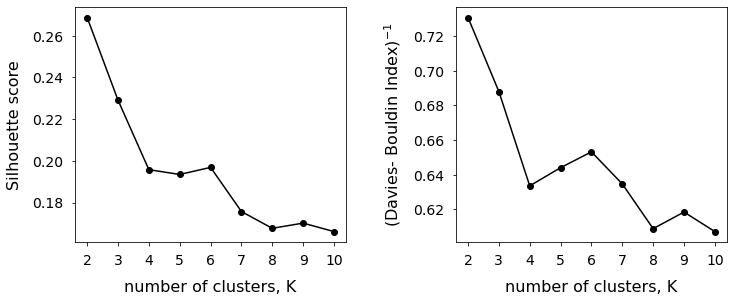

In [42]:
ks = range(2, 11) # range of K

inertias = [] # empty vector to append inertia for each K
sil = []      # empty vector to append silhouette score for each K
davies = []   # empty vector to append DB index for each K

# for loop calculates the above internal metrics for each K
for k in ks:
    # create K-means object with K clusters, random seed set at 777, applied to 18PCs
    kmeans_model = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=777).fit(PCA_components1.iloc[:,:18])
    labels = kmeans_model.labels_ # sets labels as the cluster index number to use for sil score
    
    # Append the DB Index, inertia and silhouette score to above vectors
    davies.append(davies_bouldin_score(PCA_components1.iloc[:,:18], labels))
    inertias.append(kmeans_model.inertia_)
    sil.append(silhouette_score(PCA_components1.iloc[:,:18], labels, metric='euclidean'))

# plot silhouette score (left) and DB Index (right) for each K
plt.figure(figsize=(11, 5))
plt.subplot(1,2,1)
plt.plot(ks,sil,"-o" ,color='black')
plt.ylabel('Silhouette score', fontsize=16, labelpad=10)
plt.xlabel('number of clusters, K', fontsize=16, labelpad=12)
plt.grid(False)
plt.xticks(np.arange(2, 11, step=1)) 

plt.subplot(1,2,2)
plt.plot(ks, 1/np.asarray(davies),"-o", color='black')
plt.ylabel('(Davies- Bouldin Index)$^{-1}$', fontsize=16, labelpad=10)
plt.xlabel('number of clusters, K', fontsize=16, labelpad=12)
plt.grid(False)
plt.xticks(np.arange(2, 11, step=1)) 

plt.tight_layout(pad=3.0)
# plt.savefig("sil_davies_18pc.pdf") # save the plot to pdf

### Inertia plot
Now plot the Inertia over the range of K

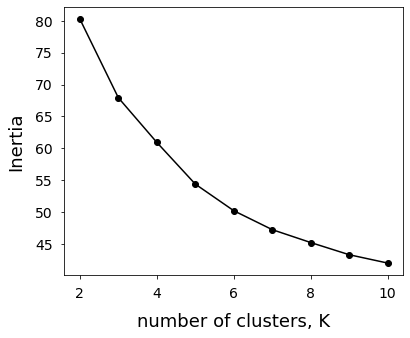

In [43]:
plt.figure(figsize=(6, 5))
y = np.array([45000,50000,55000,60000,65000,70000,75000,80000])
my_yticks = ['45','50','55','60','65','70','75','80']
plt.yticks(y, my_yticks)
plt.plot(ks,inertias,"-o" ,color='black')
plt.ylabel("Inertia", fontsize=18, labelpad=10)
plt.xlabel('number of clusters, K', fontsize=18, labelpad=12)
plt.grid(False)

plt.tight_layout(pad=1.5)
# plt.savefig("inertia_18pc.pdf") #save the plot to pdf

From the above, K=2, 3 and 6 is chosen to compare for the remainder of the analysis.

### Visualising silhouette coefficients for K=2, 3

For n_clusters = 2 The average silhouette_score is : 0.26871765525241786
For n_clusters = 3 The average silhouette_score is : 0.22908457468544413


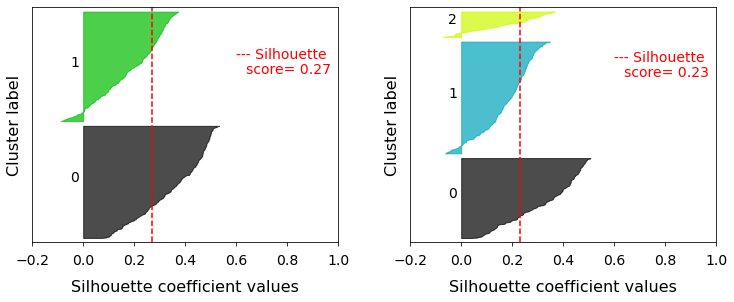

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)

ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(PCA_components1) + (2 + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
clusterer = KMeans(n_clusters=2,init='k-means++', n_init=10, random_state=777)
cluster_labels = clusterer.fit_predict(PCA_components1.iloc[:,:18])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
silhouette_avg = silhouette_score(PCA_components1.iloc[:,:18], cluster_labels)
print("For n_clusters =", 2,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(PCA_components1.iloc[:,:18], cluster_labels)

y_lower = 10
for i in range(2):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 2)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=14)

        # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_xlabel("Silhouette coefficient values",fontsize=16, labelpad=12)
ax1.set_ylabel("Cluster label",fontsize=16, labelpad=10)

    # The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax1.text(0.6, 420, "--- Silhouette", color="red", fontsize=14)
ax1.text(0.64, 385, "score= 0.27", color="red", fontsize=14)
ax1.grid(False)
ax1.tick_params(labelsize=14)

ax2.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
ax2.set_ylim([0, len(PCA_components1) + (3 + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
clusterer = KMeans(n_clusters=3,init='k-means++', n_init=10, random_state=777)
cluster_labels = clusterer.fit_predict(PCA_components1.iloc[:,:18])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
silhouette_avg = silhouette_score(PCA_components1.iloc[:,:18], cluster_labels)
print("For n_clusters =", 3,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(PCA_components1.iloc[:,:18], cluster_labels)

y_lower = 10
for i in range(3):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 3)
    ax2.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
    ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=14)

        # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax2.set_xlabel("Silhouette coefficient values",fontsize=16, labelpad=12)
ax2.set_ylabel("Cluster label",fontsize=16, labelpad=10)

    # The vertical line for average silhouette score of all the values
ax2.axvline(x=silhouette_avg, color="red", linestyle="--")

ax2.set_yticks([])  # Clear the yaxis labels / ticks
ax2.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax2.text(0.6, 420, "--- Silhouette", color="red", fontsize=14)
ax2.text(0.64, 385, "score= 0.23", color="red", fontsize=14)
#ax2.grid(False)
ax2.tick_params(labelsize=14)

fig.tight_layout(pad=3.0)
# fig.savefig("sill_18pc_2_3_clusters.pdf") # save the plot to pdf

### Visualising silhouette coefficients for K=6

For n_clusters = 6 The average silhouette_score is : 0.19687721022617172


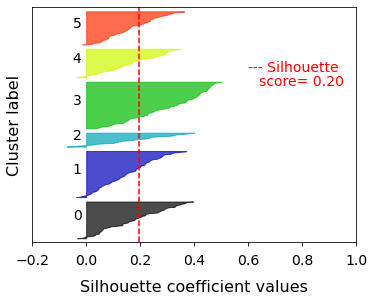

In [47]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(6, 5)

ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(PCA_components1) + (6 + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
clusterer = KMeans(n_clusters=6,init='k-means++', n_init=10, random_state=777)
cluster_labels = clusterer.fit_predict(PCA_components1.iloc[:,:18])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
silhouette_avg = silhouette_score(PCA_components1.iloc[:,:18], cluster_labels)
print("For n_clusters =", 6,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(PCA_components1.iloc[:,:18], cluster_labels)

y_lower = 10
for i in range(6):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 6)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=14)

        # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_xlabel("Silhouette coefficient values",fontsize=16, labelpad=12)
ax1.set_ylabel("Cluster label",fontsize=16, labelpad=10)

    # The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax1.text(0.6, 420, "--- Silhouette", color="red", fontsize=14)
ax1.text(0.64, 385, "score= 0.20", color="red", fontsize=14)
ax1.grid(False)
ax1.tick_params(labelsize=14)

fig.tight_layout(pad=3.0)
# fig.savefig("sill_18pc_6_clusters.pdf") 

### Save cluster allocations for 18PCs to a csv file
First for K=2:

In [48]:
# K-means object using 2 clusters, k-means++ initialisation and random seed of 777, applied to 18PCs
km2 = KMeans(init='k-means++', n_clusters=2, n_init=10, random_state=777).fit(PCA_components1.iloc[:,:18])

labels2 = km2.labels_

# writing to csv file

# field names  
fields = ['Ward','Municipality' ,'Cluster']  
wards = df_labels.iloc[:,0]
muni = df_labels.iloc[:,1]
     
# data rows of csv file  
list_rows2 = [ (wards),(muni),(km2.labels_) ]
rows2 = zip(*list_rows2) #takes transpose of rows
    
# then store cluster allocations to that file:
with open(os.path.join(CLUSTERS_DIR, "508wards_18pc_2cluster.csv"), 'w') as csvfile:
       # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
        # writing the fields  
    csvwriter.writerow(fields)  
        
        # writing the data rows  
    csvwriter.writerows(rows2) 

Now for K=6:

In [49]:
# K-means object using 6 clusters, k-means++ initialisation and random seed of 777, applied to 18PCs:
km6 = KMeans(init='k-means++', n_clusters=6, n_init=10, random_state=777).fit(PCA_components1.iloc[:,:18])

labels6 = km6.labels_

# writing to csv file

# field names  
fields = ['Ward','Municipality' ,'Cluster']  
wards = df_labels.iloc[:,0]
muni = df_labels.iloc[:,1]
     
# data rows of csv file  
list_rows6 = [ (wards),(muni),(km6.labels_) ]
rows6 = zip(*list_rows6) #takes transpose of rows

# save images to specific directory
if not os.path.exists('../visualisation_validation/cluster_labels'):
     os.makedirs('../visualisation_validation/cluster_labels')
    
    # storing the responses in a file (images)
with open(os.path.join(CLUSTERS_DIR, "508wards_18pc_6cluster.csv"), 'w') as csvfile:
       # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
        # writing the fields  
    csvwriter.writerow(fields)  
        
        # writing the data rows  
    csvwriter.writerows(rows6) 